Evaluating clustering algorithms (unsupervised learning) presents a unique challenge because we typically don't have ground truth labels to compare against, unlike in classification or regression. Therefore, evaluation often relies on metrics that assess the quality of the clusters based on the data itself (intrinsic methods) or, if ground truth is available (e.g., for benchmarking), metrics that compare the clusters to the known classes (extrinsic methods).

## Evaluation Metrics for Clustering Models

This document covers:

* **The Challenge:** Explains why evaluating clustering is different due to the lack of ground truth labels.
* **Intrinsic Metrics:** Focuses on the Silhouette Coefficient (`silhouette_score`), explaining its calculation (cohesion vs. separation), range (-1 to 1), and interpretation (higher is better).
* **Extrinsic Metrics:** Focuses on the Adjusted Rand Index (ARI) (`adjusted_rand_score`), explaining how it compares predicted clusters to true labels (adjusting for chance), its range, and interpretation (1 is perfect agreement). Briefly mentions Homogeneity, Completeness, and V-measure.
* **Demonstration:** Applies `K-Means` clustering to the Iris and synthetic blob datasets and calculates both Silhouette Score and ARI.
* **Visualization:** Includes an example plot comparing `K-Means` results to true labels for the blobs dataset.
* **Limitations:** Discusses that metrics should often be used in conjunction with visual inspection and domain knowledge, and clarifies the use cases for intrinsic vs. extrinsic measures.

---

This provides a foundation for evaluating the results of your clustering algorithms.

--- Loading and Preparing Data ---
Iris scaled shape: (150, 4)
Blobs scaled shape: (300, 2)
------------------------------
--- Performing K-Means Clustering ---
K-Means applied to Iris data (K=3).
K-Means applied to Blobs data (K=4).
------------------------------
--- Intrinsic Evaluation: Silhouette Score ---
Silhouette Score for Iris K-Means (K=3): 0.4599
Silhouette Score for Blobs K-Means (K=4): 0.8386
------------------------------
--- Extrinsic Evaluation (Requires True Labels) ---
a) Adjusted Rand Index (ARI) for Iris K-Means vs True Labels: 0.6201
   Adjusted Rand Index (ARI) for Blobs K-Means vs True Labels: 1.0000

b) Other metrics like Homogeneity, Completeness, V-measure also exist.
------------------------------
--- Visualizing Clusters (Blobs Example) ---


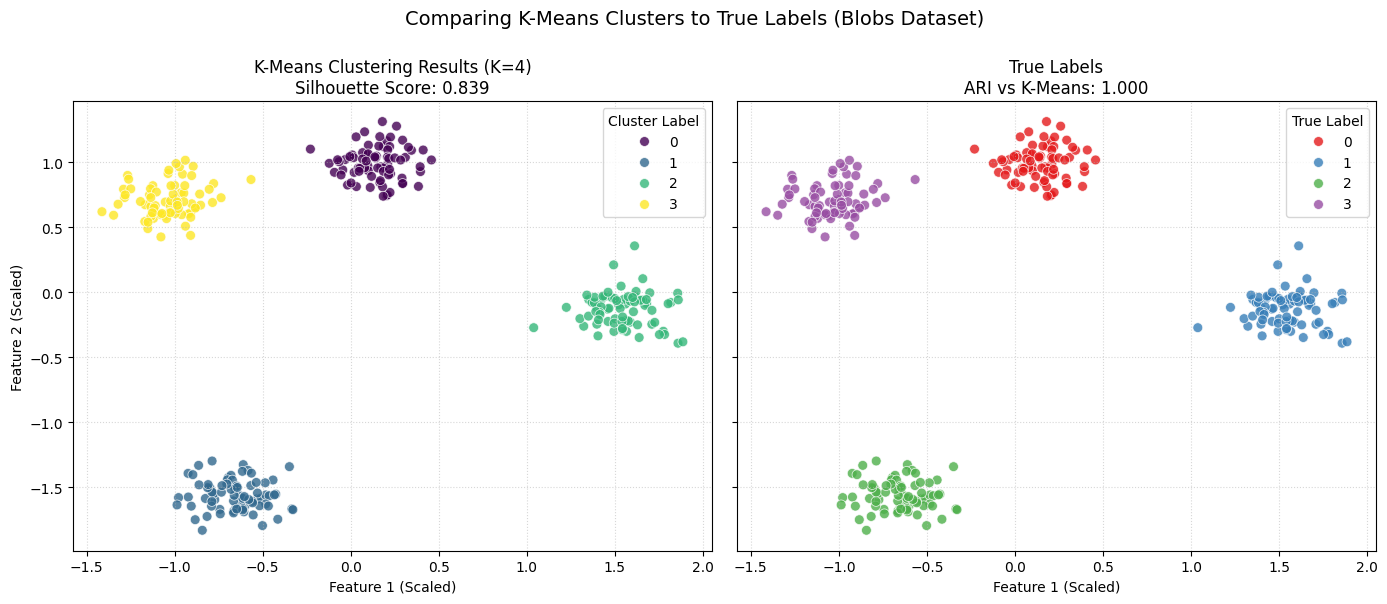

Generated comparison plot for blobs dataset.
------------------------------
--- Limitations and Considerations ---
- Intrinsic metrics (like Silhouette) help compare clustering results for different 'K'
  or different algorithms on the *same* data, but absolute values can be hard to interpret.
- Extrinsic metrics require ground truth, which is often unavailable in real unsupervised tasks.
  They are mainly for benchmarking or evaluating on labeled data where labels were ignored during clustering.
- The 'best' number of clusters or the 'quality' often depends on the specific application
  and may require visual inspection and domain knowledge in addition to metrics.
------------------------------


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Example clustering algorithm
# Metrics
from sklearn.metrics import silhouette_score, adjusted_rand_score
# Other metrics (mention)
# from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

# --- 1. The Challenge of Evaluating Clustering ---
# - No ground truth 'y' labels to directly compare predictions against.
# - Evaluation aims to assess the "quality" of the found clusters based on certain criteria:
#   - Compactness: Points within a cluster should be close to each other.
#   - Separation: Clusters should be well-separated from each other.
# - Metrics are divided into:
#   - Intrinsic: Evaluate based only on the data and cluster assignments (e.g., Silhouette Score).
#   - Extrinsic: Evaluate by comparing cluster assignments to known ground truth classes
#     (useful for benchmarking algorithms on labeled datasets where labels are *temporarily ignored* during clustering).

# --- 2. Load and Prepare Data ---
print("--- Loading and Preparing Data ---")
# Iris dataset: Has known classes, useful for demonstrating extrinsic metrics.
iris = load_iris()
X_iris = iris.data
y_iris_true = iris.target # True labels (used ONLY for extrinsic evaluation)
feature_names_iris = iris.feature_names

# Scale the data (important for K-Means)
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# Generate synthetic blob data (good for visualizing clusters)
X_blobs, y_blobs_true = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)
X_blobs_scaled = StandardScaler().fit_transform(X_blobs)


print(f"Iris scaled shape: {X_iris_scaled.shape}")
print(f"Blobs scaled shape: {X_blobs_scaled.shape}")
print("-" * 30)


# --- 3. Perform Clustering (Example: K-Means) ---
# We need cluster assignments to evaluate the metrics.
print("--- Performing K-Means Clustering ---")

# K-Means on Iris (using K=3, matching true classes)
kmeans_iris = KMeans(n_clusters=3, n_init=10, random_state=42)
cluster_labels_iris = kmeans_iris.fit_predict(X_iris_scaled)
print("K-Means applied to Iris data (K=3).")

# K-Means on Blobs (using K=4, matching true centers)
kmeans_blobs = KMeans(n_clusters=4, n_init=10, random_state=42)
cluster_labels_blobs = kmeans_blobs.fit_predict(X_blobs_scaled)
print("K-Means applied to Blobs data (K=4).")
print("-" * 30)


# --- 4. Intrinsic Evaluation Metrics (No Ground Truth Needed) ---
# Evaluate based on the structure of the clusters themselves.

print("--- Intrinsic Evaluation: Silhouette Score ---")
# Silhouette Coefficient: Measures how similar a data point is to its own cluster (cohesion)
# compared to other clusters (separation).
# - Range: [-1, 1]
# - Interpretation:
#   - +1: Point is very dense within its cluster and far from others (ideal).
#   -  0: Point is close to a decision boundary between clusters.
#   - -1: Point is likely assigned to the wrong cluster.
# - The Silhouette Score is the *mean* Silhouette Coefficient over all samples.
# - Higher average score indicates better-defined clusters. Requires >= 2 clusters.

# Calculate Silhouette Score for Iris clustering
silhouette_iris = silhouette_score(X_iris_scaled, cluster_labels_iris)
print(f"Silhouette Score for Iris K-Means (K=3): {silhouette_iris:.4f}")

# Calculate Silhouette Score for Blobs clustering
silhouette_blobs = silhouette_score(X_blobs_scaled, cluster_labels_blobs)
print(f"Silhouette Score for Blobs K-Means (K=4): {silhouette_blobs:.4f}")

# Note: Silhouette score can be used to help choose the optimal number of clusters (K),
# by calculating it for different K values and looking for a peak (though visual methods
# like the Elbow method with inertia are also common).
print("-" * 30)


# --- 5. Extrinsic Evaluation Metrics (Requires Ground Truth Labels) ---
# Compare the clustering results to known class labels. Useful for algorithm benchmarking.

print("--- Extrinsic Evaluation (Requires True Labels) ---")

# a) Adjusted Rand Index (ARI)
# Measures the similarity between the true labels and the predicted cluster labels,
# adjusting for chance groupings.
# - Range: [-1, 1] (can be negative for bad clustering)
# - Interpretation:
#   - 1: Perfect agreement between true labels and clusters.
#   - 0: Clustering is random with respect to true labels.
#   - Negative: Clustering is worse than random.
# - Does NOT require clusters/labels to be permutation-matched.

# Calculate ARI for Iris clustering vs true Iris species
ari_iris = adjusted_rand_score(y_iris_true, cluster_labels_iris)
print(f"a) Adjusted Rand Index (ARI) for Iris K-Means vs True Labels: {ari_iris:.4f}")

# Calculate ARI for Blobs clustering vs true Blob labels
ari_blobs = adjusted_rand_score(y_blobs_true, cluster_labels_blobs)
print(f"   Adjusted Rand Index (ARI) for Blobs K-Means vs True Labels: {ari_blobs:.4f}")


# b) Other Extrinsic Metrics (Mention)
# - Homogeneity: Checks if each cluster contains only members of a single class.
# - Completeness: Checks if all members of a given class are assigned to the same cluster.
# - V-measure: Harmonic mean of Homogeneity and Completeness.
# (These metrics require permutation matching or specific interpretation)
# homogeneity = homogeneity_score(y_iris_true, cluster_labels_iris)
# completeness = completeness_score(y_iris_true, cluster_labels_iris)
# v_measure = v_measure_score(y_iris_true, cluster_labels_iris)
# print(f"\nb) Homogeneity: {homogeneity:.4f}, Completeness: {completeness:.4f}, V-measure: {v_measure:.4f}")
print("\nb) Other metrics like Homogeneity, Completeness, V-measure also exist.")
print("-" * 30)


# --- 6. Visualizing Clusters (Example with Blobs) ---
# Visual inspection is often crucial alongside metrics.
print("--- Visualizing Clusters (Blobs Example) ---")

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot based on K-Means cluster labels
sns.scatterplot(x=X_blobs_scaled[:, 0], y=X_blobs_scaled[:, 1], hue=cluster_labels_blobs,
                palette='viridis', s=50, alpha=0.8, ax=axes[0])
axes[0].set_title(f'K-Means Clustering Results (K=4)\nSilhouette Score: {silhouette_blobs:.3f}')
axes[0].set_xlabel('Feature 1 (Scaled)')
axes[0].set_ylabel('Feature 2 (Scaled)')
axes[0].legend(title='Cluster Label')
axes[0].grid(True, linestyle=':', alpha=0.5)

# Plot based on true labels (for comparison)
sns.scatterplot(x=X_blobs_scaled[:, 0], y=X_blobs_scaled[:, 1], hue=y_blobs_true,
                palette='Set1', s=50, alpha=0.8, ax=axes[1])
axes[1].set_title(f'True Labels\nARI vs K-Means: {ari_blobs:.3f}')
axes[1].set_xlabel('Feature 1 (Scaled)')
axes[1].set_ylabel('') # Shared Y axis
axes[1].legend(title='True Label')
axes[1].grid(True, linestyle=':', alpha=0.5)

plt.suptitle("Comparing K-Means Clusters to True Labels (Blobs Dataset)", fontsize=14, y=1.0)
plt.tight_layout()
plt.show()
print("Generated comparison plot for blobs dataset.")
print("-" * 30)


# --- 7. Limitations and Considerations ---
print("--- Limitations and Considerations ---")
print("- Intrinsic metrics (like Silhouette) help compare clustering results for different 'K'")
print("  or different algorithms on the *same* data, but absolute values can be hard to interpret.")
print("- Extrinsic metrics require ground truth, which is often unavailable in real unsupervised tasks.")
print("  They are mainly for benchmarking or evaluating on labeled data where labels were ignored during clustering.")
print("- The 'best' number of clusters or the 'quality' often depends on the specific application")
print("  and may require visual inspection and domain knowledge in addition to metrics.")
print("-" * 30)